<a href="https://colab.research.google.com/github/MarkusSchilling/py_scripts/blob/main/Python_Helper_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Helper Functions

This notebook is supposed to collect some functions that may come up handy at some time when trying to write some scripts. This collection may never be finished but it also does raise no claim to completeness, at all.

# Installation & Imports of relevant packages

Occasionally, the list of package installations and imports may have to be updated, depending on the requirements set by the functions that are defined below.

In [ ]:
# Packages that need to installed (for the sake of completeness, there are a lot of packages given, here.)
%pip install rdflib
%pip install sparqlwrapper
! apt install libgraphviz-dev
%pip install graphviz
%pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.9 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 8 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,03

In [ ]:
# Imports that need to performed (for the sake of completeness, there are a lot of imports given, here.)
from rdflib import Graph, Namespace, URIRef, Literal, XSD, RDF, RDFS, PROV, OWL, DC, BNode
from rdflib.term import Identifier
from rdflib.collection import Collection
from rdflib.namespace import RDF, RDFS, SKOS, XSD, OWL
from rdflib.tools import rdf2dot
import rdflib.plugins.sparql.update

import pandas as pd
import io
from io import StringIO, BytesIO
import urllib.parse
from IPython.display import display, Markdown, HTML, JSON, Image
from scipy.spatial import Delaunay
from scipy.spatial.distance import euclidean
import numpy as np
import matplotlib.pyplot as plt
import sys
import difflib
import os
import pydotplus


! git clone https://github.com/pebbie/sparqlgpviz
! pip install pyvis
if not '/content/sparqlgpviz' in sys.path:
    sys.path.insert(0,'/content/sparqlgpviz')
from sparqlgraphviz import to_AGraph, to_networkx

Cloning into 'sparqlgpviz'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 75 (delta 27), reused 62 (delta 17), pack-reused 0
Receiving objects: 100% (75/75), 937.33 KiB | 3.18 MiB/s, done.
Resolving deltas: 100% (27/27), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00


# Helper Functions

## Find differences in strings

In [ ]:
# Function to find differences in two strings
import difflib

cases=[("String 1", "String 2")]
# Instead of strings given in "", lists and dataframes (variables) can also be used, such as: cases=[(CSV, CSV2)]

for a,b in cases:
    print('{} => {}'.format(a,b))
    for i,s in enumerate(difflib.ndiff(a, b)):
        if s[0]==' ': continue
        elif s[0]=='-':
            print(u'Delete "{}" from position {}'.format(s[-1],i))
        elif s[0]=='+':
            print(u'Add "{}" to position {}'.format(s[-1],i))
    print()

String 1 => String 2
Delete "1" from position 7
Add "2" to position 8



## Global Counter

In [ ]:
# Defining a global counter possibly usable for the creation of arbitrary instance names (numbers)
instanceCounter = 0
def nextInstanceNum():
    global instanceCounter
    instanceCounter = instanceCounter + 1
    return str(instanceCounter)

In [ ]:
# Helper method 'add' used to write triples to an RDF graph
def add(s,p,o):

    # in this case p is "ObjectProperty"
    if o.find('http://')==0 or o.find('https://')==0:
        g.add( (URIRef(s), URIRef(p), URIRef(o)) )

    # in this case p is "DatatypeProperty"
    else:
        # if we can parse o as Float, just set the datatype
        try:
            g.add( (URIRef(s), URIRef(p), Literal(float(o), datatype=XSD.float) ))
        except:
            g.add( (URIRef(s), URIRef(p), Literal(o) ))

## Read in CSV data

In [ ]:
# Read in CSV data

CSV = open("test.csv").read()
# CSV dataset namehas to be set, accordingly. Function will store data as a string!

# Store data directly to a dataframe
import pandas as pd
CSV_df = pd.read_csv('test.csv')
# CSV dataset namehas to be set, accordingly.

# Also possible: load data from the 'CSV-string' created above to a dataframe
data = pd.read_csv(io.StringIO(CSV), sep=';')

FileNotFoundError: ignored

In [ ]:
# Change standard output to a file of choice
import sys
old_stdout = sys.stdout
sys.stdout = open('output-file.csv', 'w') # Outpul file name AND format have to be changed, accordingly.

## Change the standard output file in Jupyter Notebook to a file of choice

In [ ]:
# How to write strings to a CSV line by line
text = "This is an example., This is another example for the second line. "
# Set ',' as separator for 1 line; set ';' as separator for the next column.

s = StringIO(text)
with open('fileName.csv', 'w') as f:
    for line in s:
        f.write(line)

# The fileName has to be set, accordingly.

## Compare strings (case sensitive)

In [ ]:
# How to compare strings (case sensitive)
string1 = "Abrar"
string2 = "Ahmed"
string3 = "ABCD"
string4 = "ABCD"
if string1 <= string2:
    print(string1," is smaller ",string2," is greater")
if string2 >= string4:
    print(string4," is smaller ", string2," is greater")
if string3 == string4:
    print(string3," is equal to ",string4)
if string1 != string3:
    print(string1," is not equal to ", string3)

# The second method is to use a dedicated string function to perform comparisons,
# the __eq__() function. It is a magic function defined in the string class and
# compares two strings to return True if they are equal or Fale if they are not.

# if s1.__eq__(s2):
  #  print('s1 and s2 are equal.')

## Compare strings (case insensitive)

In [ ]:
# How to compare strings (case insensitive)
s1 = 'String'
s2 = 'String'
s3 = 'string'

if s1.casefold() == s3.casefold():
    print(s1.casefold())
    print(s3.casefold())
    print('s1 and s3 are equal in case-insensitive comparison')

if s1.lower() == s3.lower():
    print(s1.lower())
    print(s3.lower())
    print('s1 and s3 are equal in case-insensitive comparison')

if s1.upper() == s3.upper():
    print(s1.upper())
    print(s3.upper())
    print('s1 and s3 are equal in case-insensitive comparison')

## Transfom Inputs to IRIs (Ontology development)

In [ ]:
# Function to transform inputs to IRIs.
def to_iri(input):
    try:
        return input.iri
    except:
        pass
    return input

# Function to write the result of a SPARQL query into a (pandas) data frame.
import pandas as pd
def sparql_result_to_df(res):
    l = []
    for row in res:
        r = [ to_iri(item)  for item in row]
        l.append(r)
    return pd.DataFrame(l)

## Triangulation to get the average distances between X and Y coordinates

This function originated from an analysis of precipitates as a result of a heat treatment of an aluminium alloy. The result will also be plotted when using this function.

In [ ]:
# Function for triangulation to get the average precipitate distance out of X and Y coordinates in dependence on the material designation and the images taken.

MATL_DESIGNATION = 1
# MATL_DESIGNATION_LABEL = 2
IMG = 4
XPOSITION = 6
YPOSITION = 8
plt.subplots(figsize=(12., 12.))
cmap = plt.get_cmap("Purples")
lambdas_50pct = dict()
for matl_designation, group in df.groupby(by=[MATL_DESIGNATION]):
    result = []
    for img, subgroup in group.groupby(by=[IMG]):
      tup = subgroup[YPOSITION], subgroup[XPOSITION]
      point_coords = np.vstack(tup).T
      tri = Delaunay(point_coords)
      for simplex in tri.simplices:
          #Compute the three distances of the points 1-2, 1-3, 2-3
          for i,j in ((0,1), (0, 2), (1,2)):
              point = (point_coords[simplex[i]], point_coords[simplex[j]])
              result.append(euclidean(point[0], point[1]))
    X = np.sort(result)
    X *= 0.15 #nm per pixel
    Y = np.linspace(0., 1., num=len(X))
    lambda_50pct = X[int(len(X)/2)]
    lambdas_50pct[matl_designation] = lambda_50pct
    print(matl_designation, ", approx 50% quantil: {lambda_50pct:.1f}".format(lambda_50pct=lambda_50pct))
    plt.plot(X, Y, '.', label=(matl_designation + "lambda=", str(lambda_50pct)))

plt.xlabel("Distance in nm")
plt.ylabel("Quantile")
# plt.legend()
plt.show()

## Parsing and combining ontology files

In this section, functions are given that help to parse, combine, and visualize ontology files (e.g. in ttl format).

In [ ]:
# Select several, different files
# Files can either be loaded from a URL source or directly from a temporary repo they have been read in.
# The files will be parsed and connected in ONE graph, which can afterwards also be re-serialized as one ontology (ttl) file.

file1="https://raw.githubusercontent.com/materialdigital/core-ontology/main/pmd_core.ttl" # a) PMDco
file2="https://raw.githubusercontent.com/materialdigital/application-ontologies/ea60bfd6a8961e1156e538deef4a9b9d6b70e126/tensile_test_ontology_TTO/pmd_tto.ttl" # b) TTO based on PMDco 2.0
file3="https://raw.githubusercontent.com/materialdigital/application-ontologies/ea60bfd6a8961e1156e538deef4a9b9d6b70e126/tensile_test_ontology_TTO/pmd_tto_data_mapping_example.ttl" # c) TTO Data Mapping example
# file4="42CrMoS4-dataset.ttl"
g = Graph()
g.parse(file1, format='ttl')
g.parse(file2, format='ttl')
g.parse(file3, format='ttl')
# g.parse(file4, format='ttl')

print(f"Loaded {len(g)} triples.")

# Serialization of graph
g.serialize("my_data.ttl", format="ttl")

Loaded 5482 triples.


<Graph identifier=Nc73f325fc9fa4b85aa5b94912b2e8414 (<class 'rdflib.graph.Graph'>)>

In [ ]:
# Select several, different files
# Files can either be loaded from a URL source or directly from a temporary repo they have been read in.
# The files will be parsed and connected in ONE graph, which can afterwards also be re-serialized as one ontology (ttl) file.

file1="https://raw.githubusercontent.com/materialdigital/core-ontology/main/pmd_core.ttl" # a) PMDco
file2="2023-07-24_pmd_tto_data_mapping_example.ttl" # b) S355 Dataset
file3="RDF-TTO-data_42CrMoS4.ttl" # c) 42CrMoS4 Dataset
# file4="42CrMoS4-dataset.ttl"
g = Graph()
g.parse(file1, format='ttl')
g.parse(file2, format='ttl')
g.parse(file3, format='ttl')
# g.parse(file4, format='ttl')

print(f"Loaded {len(g)} triples.")

# Serialization of graph
g.serialize("pmdco_2_tto_merged_data.ttl", format="ttl")

Loaded 14156 triples.


<Graph identifier=N9b62b03335414848b1c5ac39e52cc27d (<class 'rdflib.graph.Graph'>)>

In [ ]:
# A short way of inspecting the graph: what namespaces are contained in it?
for prefix, namespace in g.namespaces():
  print(prefix, namespace)

## Visualization of ontology graphs and SPARQL queries

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.530863 to fit



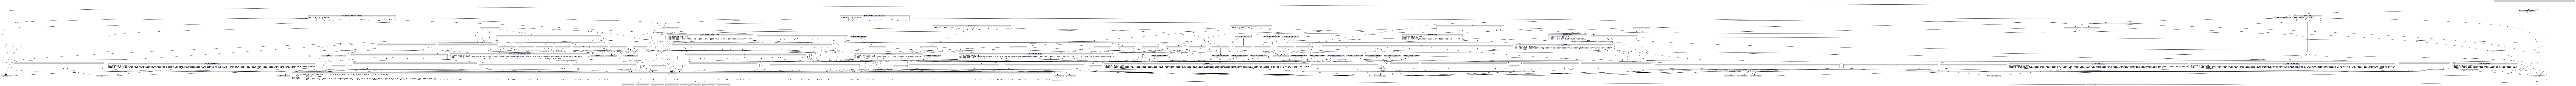

In [ ]:
# Visualize files / graphs (Here, file 2 given in previous cell is visualized.)
# File may be adjusted to the one that is supposed to be visualized
# Caution: File may be too large for (bitmap) rendering.
# Click on output to enlarge.

tmp = Graph().parse(file2, format='ttl')
sio = StringIO()
rdf2dot.rdf2dot(tmp, sio)
display(Image(pydotplus.graph_from_dot_data(sio.getvalue()).create_png()))
del(tmp)
del(sio)

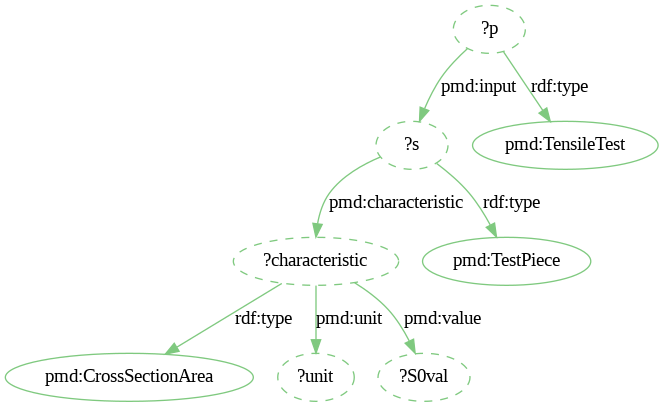

In [ ]:
# A way of visualizing a query

query=("""
PREFIX pmd: <https://w3id.org/pmd/co/>
SELECT distinct ?s ?S0val ?unit
WHERE {
?s a pmd:TestPiece .
?p a pmd:TensileTest .
?p pmd:input ?s .
?s pmd:characteristic ?characteristic .
?characteristic a pmd:CrossSectionArea .
?characteristic pmd:value ?S0val .
?characteristic pmd:unit ?unit .
FILTER regex(str(?output), "S0")
} ORDER BY ?p
"""
)

# Visualization of the query
sq_g = to_AGraph(query)
sq_g.draw(path="sq_g.png")  # Could use a tempfile here...
Image(filename='sq_g.png')  # Sorry, didn't find a way to display it directly

## Read in and transform Excel data, multiple worksheets of the same workbook

In [ ]:
# Read the entire Excel file
nrows = 13 # number of relevant rows in the excel sheet
# Excel files are
dic_df = pd.read_excel('Stress_Strain_Curves_Batch5.xlsx', sheet_name=None, nrows=nrows)
key0 = list(dic_df.keys())[0]

# define header as numpy array.
# values = header+1
# units = header+2
header = np.array([0, 3, 6, 9])

## create header for the final dataframe. I just choose '46NT71' as this is in the list
HeaderUnitList = []
for idx in header:
    for row in range(nrows):
        # filter for the right cells
        if idx < 9:
            if str(dic_df[key0].iloc[row, idx]) != "nan":
                if str(dic_df[key0].iloc[row, idx+2]) != "nan":
                    HeaderUnitList.append(dic_df[key0].iloc[row, idx] + " " + dic_df[key0].iloc[row, idx+2])
                else:
                    HeaderUnitList.append(dic_df[key0].iloc[row, idx])
        if idx == 9:
            if str(dic_df[key0].iloc[row, idx]) != "nan":
                HeaderUnitList.append(dic_df[key0].iloc[row, idx])
## Create a liste of all values for each sheet
# Values = [[...], [...]]
Values = []
for key in dic_df:
    temp = []
    for idx in header:
        for row in range(nrows):
            if str(dic_df[key].iloc[row, idx]) != "nan":
                temp.append(dic_df[key].iloc[row, idx+1])
    Values.append(temp)

# create a final DataFrame out of all sheets
result_read_in = pd.DataFrame(data = Values, columns = HeaderUnitList)
result_read_in

ValueError: ignored

## Get status of a web resource

In [4]:
# Function to check for the status of a website (HTML status represented by code)

import requests
import urllib.request

url = f"https://your_URL.com"
requests.get(url)

<Response [200]>

In [ ]:
# Another way of checking for website availability
# Within this function, a header is used for specific authentication

from urllib.request import Request, urlopen
url = f"https://your_URL.com"
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(req)
html